In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
#from sklearn import metrics

In [2]:
mat=pd.read_csv('ex2data1-logistic.csv')

In [3]:
x1=mat['x1']
x2=mat['x2']
x1=np.array(x1.T)
x2=np.array(x2.T)
x1=(x1-np.mean(x1))/np.std(x1)
x2=(x2-np.mean(x2))/np.std(x2)
y=mat['y']
y=np.array(y.T)

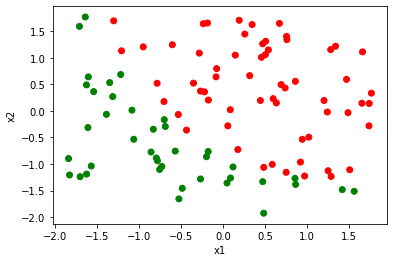

In [4]:
c=['green','red']
a=[]
for i in range(100):
    a.append(c[y[i]])

plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1,x2,c=a)

In [5]:
X0 = np.ones(shape=100,dtype='int')
X0=X0.reshape(100, 1)
temp=np.column_stack((X0,x1))


In [6]:
X=np.column_stack((temp,x2))
X.shape

(100, 3)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape
y_train.shape

(90,)

In [8]:
def sigmoid(theta, X): 
    return 1.0/(1 + np.exp(-np.dot(X, theta.T)))  

In [9]:
def log(theta, X, y): 
    ans1 = sigmoid(theta, X) - y.reshape(X.shape[0],1) 
    ans = np.dot(ans1.T, X) 
    return ans

In [25]:
y.reshape(X.shape[0],1) 
y.shape

(100,)

In [11]:
def cost_f(theta, X, y): 
    log_v = sigmoid(theta, X) 
    #y = np.squeeze(y) 
    step1 = y * np.log(log_v) 
    step2 = (1 - y) * np.log(1 - log_v) 
    final = -step1 - step2 
    return np.mean(final)

In [12]:
def grad_desc(X, y,theta, lr=.01, precision=.001): 
    cost = cost_f(theta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > precision): 
        old_cost = cost 
        theta = theta - (lr * log(theta, X, y)) 
        cost = cost_f(theta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return theta, num_iter

In [13]:
def pred(theta, X): 
    pred_prob = sigmoid(theta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value)

In [14]:
def plot_reg(X, y, theta): 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='g', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')  
    x1 = np.arange(-2, 2, 0.1) 
    x2 = -(theta[0,0] + theta[0,1]*x1)/theta[0,2] 
    plt.plot(x1, x2, c='k')   
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show()
    print(x2)

In [15]:
theta = np.matrix(np.zeros(X.shape[1]))


In [16]:
theta, num_iter = grad_desc(X_train, y_train, theta) 

In [17]:
print(theta.shape)
print("theta valued:", theta) 
print("No. of iterations:", num_iter) 

(1, 3)
theta valued: [[1.4277461  3.5649588  3.25369857]]
No. of iterations: 248


In [18]:
y_pred1 = pred(theta, X_train)

In [19]:
print("Correctly predicted labels:", np.sum(y_train == y_pred1))
print("Accuracy", (np.sum(y_train==y_pred1)*100)/90)

Correctly predicted labels: 80
Accuracy 88.88888888888889


In [20]:
y_pred = pred(theta, X_test)

In [21]:
print("Correctly predicted labels:", np.sum(y_test == y_pred))
print("Accuracy", (np.sum(y_test==y_pred)*100)/10)

Correctly predicted labels: 9
Accuracy 90.0


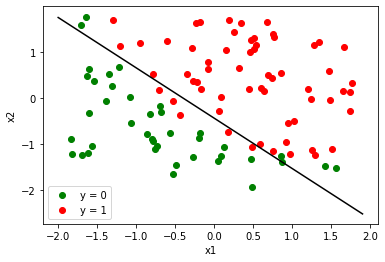

[ 1.75251990e+00  1.64295355e+00  1.53338720e+00  1.42382085e+00
  1.31425450e+00  1.20468815e+00  1.09512180e+00  9.85555446e-01
  8.75989094e-01  7.66422743e-01  6.56856392e-01  5.47290041e-01
  4.37723690e-01  3.28157339e-01  2.18590988e-01  1.09024637e-01
 -5.41714583e-04 -1.10108066e-01 -2.19674417e-01 -3.29240768e-01
 -4.38807119e-01 -5.48373470e-01 -6.57939821e-01 -7.67506173e-01
 -8.77072524e-01 -9.86638875e-01 -1.09620523e+00 -1.20577158e+00
 -1.31533793e+00 -1.42490428e+00 -1.53447063e+00 -1.64403698e+00
 -1.75360333e+00 -1.86316968e+00 -1.97273603e+00 -2.08230239e+00
 -2.19186874e+00 -2.30143509e+00 -2.41100144e+00 -2.52056779e+00]


In [22]:
plot_reg(X, y, theta) 

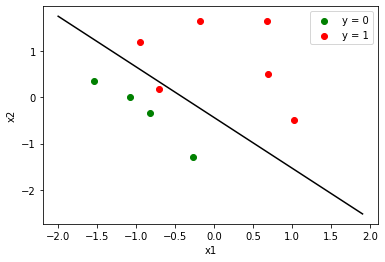

[ 1.75251990e+00  1.64295355e+00  1.53338720e+00  1.42382085e+00
  1.31425450e+00  1.20468815e+00  1.09512180e+00  9.85555446e-01
  8.75989094e-01  7.66422743e-01  6.56856392e-01  5.47290041e-01
  4.37723690e-01  3.28157339e-01  2.18590988e-01  1.09024637e-01
 -5.41714583e-04 -1.10108066e-01 -2.19674417e-01 -3.29240768e-01
 -4.38807119e-01 -5.48373470e-01 -6.57939821e-01 -7.67506173e-01
 -8.77072524e-01 -9.86638875e-01 -1.09620523e+00 -1.20577158e+00
 -1.31533793e+00 -1.42490428e+00 -1.53447063e+00 -1.64403698e+00
 -1.75360333e+00 -1.86316968e+00 -1.97273603e+00 -2.08230239e+00
 -2.19186874e+00 -2.30143509e+00 -2.41100144e+00 -2.52056779e+00]


In [23]:
plot_reg(X_test,y_test,theta)

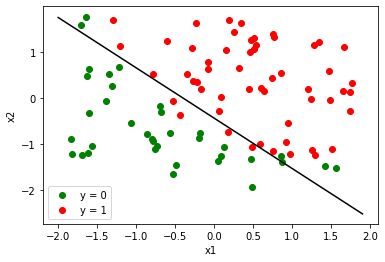

[ 1.75251990e+00  1.64295355e+00  1.53338720e+00  1.42382085e+00
  1.31425450e+00  1.20468815e+00  1.09512180e+00  9.85555446e-01
  8.75989094e-01  7.66422743e-01  6.56856392e-01  5.47290041e-01
  4.37723690e-01  3.28157339e-01  2.18590988e-01  1.09024637e-01
 -5.41714583e-04 -1.10108066e-01 -2.19674417e-01 -3.29240768e-01
 -4.38807119e-01 -5.48373470e-01 -6.57939821e-01 -7.67506173e-01
 -8.77072524e-01 -9.86638875e-01 -1.09620523e+00 -1.20577158e+00
 -1.31533793e+00 -1.42490428e+00 -1.53447063e+00 -1.64403698e+00
 -1.75360333e+00 -1.86316968e+00 -1.97273603e+00 -2.08230239e+00
 -2.19186874e+00 -2.30143509e+00 -2.41100144e+00 -2.52056779e+00]


In [24]:
plot_reg(X_train,y_train,theta)